### 국내 과일 시장과 소비 분석 및 수요예측 <br>
1. 과일 1일 섭취량 분석 : 연도별 증감량, 여성/남성 소비 비율, 소득 수준별 소비 비율 <br>
   1-1. 연령층 별 과일섭취량 순위 <br>
   1-2. 소득 수준별 과일 섭취량 순위 <br>
   1-3. 성별 과일 섭취량 비교 <br> <br>

2. 과일 가격과 과일 섭취량의 상관 관계 분석 : https://www.kamis.or.kr/customer/mypage/my_openapi/my_openapi.do <br>
   2-1. 과일별 가격 변동 추이 <br>
   2-2. 과일 기격과 물가 상관 관계 분석 <br> <br>

3. 과일별 판매량 <br>
   3-1 홈플러스 크롤링 <br>
   3-2 품목별 판매량 시각화 <br> <br>

4. 과일별 소비량 <br>
   4-1 소비량 시각화<br> <br>

5. 과일 재배지 분포 시각화 <br>
   5-1. 과일 재배지 분포 : plotly map <br> <br>

6. 과일 특성에 따른 선호도 분류 <br>
   6-1. 산도(비타민C, 구연산), 당도(당류), 수분량으로 분류 <br>
   6-2. 판매량으로 어떤 맛의 선호도가 높은지 분석 <br>  <br>
   
7. 블로그 데이터 클라우드로 보는 과일 트렌드 분석 <br>
   7-1. 네이버 블로그 API로 자료 수집 <br>
   7-2. 데이터 클라우드 생성 <br>
   7-3. 최근 일주일간의 관심도 변화

# 1. 과일 1일 섭취량 분석

## ※ 패키지 설치 및 로드

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## ※ 데이터 준비
[ 과일 1일 섭취량 데이터 설명 ] <br>
자료명 : 2021 국민건강통계 <br>
파일명 : 식품섭취.xlsx <br>
시트명 : 11.과일류 <br>
과일 섭취량 : 과일류 식품의 섭취 중량에 대한 합/분석대상자 수 <br>
소득수준 : 월가구균등화소득(월가구소득/√가구원수)을 성별·연령별(5세단위) 오분위로 분류

## 1-1. 연령층 별 과일섭취량 추이와 섭취량 순위

In [2]:
# 파일 경로와 시트명 설정
file_path = '식품섭취.xlsx' # 파일경로
sheet_name = '11.과일류' # 시트명

# Excel 파일 읽기 : 연령별 데이터
age_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=15,
                   nrows=8)

# 데이터프레임 확인
age_df

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,1459,176.9,(9.0),1506,187.1,(8.0),1199,91.8,...,(8.1),736,139.2,(9.6),535,122.3,(9.3),483,129.4,(8.8)
10-18,NaN,NaN,1440,196.9,(10.3),1370,187.5,(9.9),1205,83.9,...,(8.8),639,96.1,(7.5),469,94.8,(16.1),484,102.1,(10.5)
19-29,NaN,NaN,1550,220.0,(11.3),1370,203.7,(11.6),1045,90.3,...,(7.0),669,86.8,(8.2),624,66.7,(7.1),584,64.3,(5.8)
30-39,NaN,NaN,1866,228.8,(9.8),1805,227.0,(10.4),1466,110.8,...,(11.5),855,110.1,(8.3),633,104.4,(8.5),549,83.1,(8.0)
40-49,NaN,NaN,1461,202.9,(8.5),1601,222.4,(12.4),1559,88.7,...,(7.4),1036,165.2,(18.1),807,143.3,(9.4),810,128.1,(9.1)
50-59,NaN,NaN,1104,189.7,(11.2),979,235.4,(12.6),1015,83.7,...,(9.9),1061,201.6,(10.3),861,169.6,(11.4),909,180.2,(10.1)
60-69,NaN,NaN,942,158.6,(11.6),788,210.2,(14.1),847,63.3,...,(10.6),1043,188.6,(9.2),892,177.5,(10.3),981,177.3,(10.4)
70+,NaN,NaN,578,115.1,(11.7),549,150.1,(11.5),594,41.4,...,(10.6),1108,147.6,(7.9),987,156.7,(8.4),1140,142.1,(8.9)


In [3]:
# 2017~2021(5년) 연령별 섭취 데이터만 수집
df=age_df.drop([0,1], axis=1)
df = df.iloc[:,39::3]
df

,42,45,48,51,54
2,,,,,
1-9,812,756,736,535,483
10-18,634,605,639,469,484
19-29,653,682,669,624,584
30-39,845,862,855,633,549
40-49,1028,1050,1036,807,810
50-59,1116,1055,1061,861,909
60-69,1036,997,1043,892,981
70+,1043,1057,1108,987,1140


In [4]:
df.columns=['2017','2018','2019','2020','2021'] # 컬럼명 변경
df.index=['10대 미만','10대','20대','30대','40대','50대','60대','70대 이상'] # 인덱스명 변경
df

,2017,2018,2019,2020,2021
10대 미만,812,756,736,535,483
10대,634,605,639,469,484
20대,653,682,669,624,584
30대,845,862,855,633,549
40대,1028,1050,1036,807,810
50대,1116,1055,1061,861,909
60대,1036,997,1043,892,981
70대 이상,1043,1057,1108,987,1140


### [ 5년 간 연령별 과일 섭취량 추이 ]

[Text(0.5, 0, '년도'),
 Text(0, 0.5, '섭취량'),
 Text(0.5, 1.0, '연도에 따른 연령별 과일섭취량 추이')]

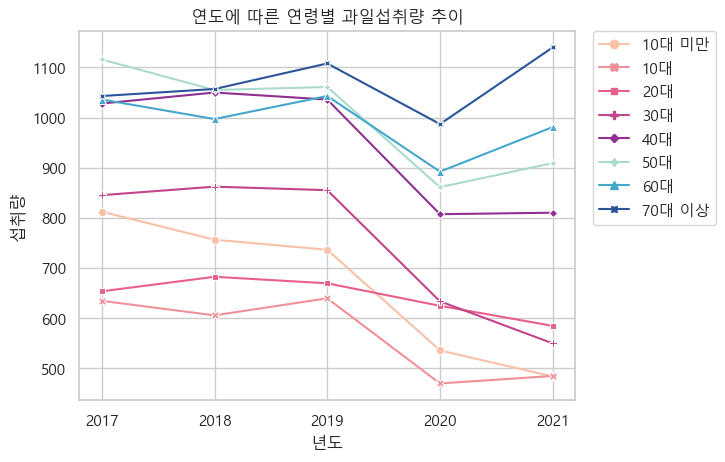

In [5]:
df_copy = df.T # x축 y축 치환
colors = ['#f8c1a8', '#ef9198', '#e8608a', '#c0458a', '#8f3192', '#aadacc', '#44a7cb', '#2a5599' ] # 색상 리스트

# 그래프 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=1, palette=colors)
ax = sns.lineplot(data=df_copy, markers=True, dashes=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량',title='연도에 따른 연령별 과일섭취량 추이')

결과: <b>2020년도에 전 연령대에서 과일 섭취량이 대폭 하락세</b>를 보였고, <br>
<b>40대 이상의 연령층</b>에서는 <b>2021년 과일 섭취량이 다시 증가</b>하기 시작했지만, 
<b>30대 이하의 연령층</b>에서는 <b>소폭 상승하거나 꾸준히 하락세</b>를 보이고 있다.

### [ 과일 섭취량이 많은 연령대 순위 ]

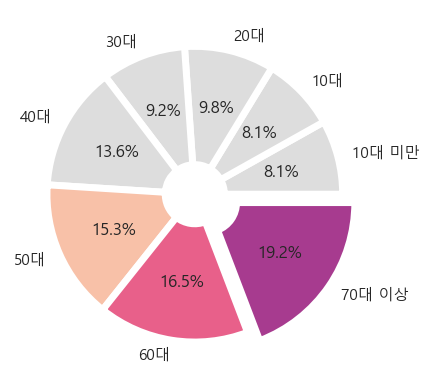

In [123]:
explode = [0, 0, 0, 0, 0, 0, 0, 0.10]
colors = ['#ddd', '#ddd', '#ddd', '#ddd', '#ddd', '#f8c1a8', '#e8608a', '#a73b8f']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_copy.loc['2021'], labels=df_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 70대 이상이 19.2%로 1위, 60대가 16.5%로 2위, 50대가 15.3%로 3위</b> <br>
대체로 연령대가 높을수록 과일 섭취량이 많은 것으로 나타났다.

### [ 과일 섭취량이 적은 연령대 순위 ]

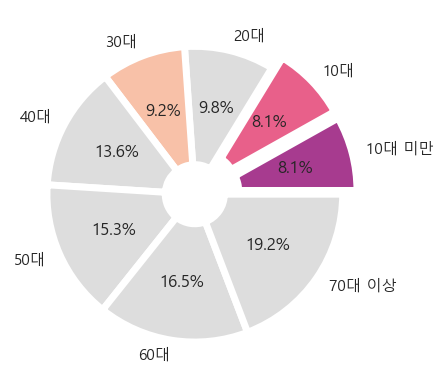

In [972]:
explode = [0.10, 0.10, 0, 0, 0, 0, 0, 0,]
colors = ['#a73b8f', '#e8608a', '#ddd','#f8c1a8', '#ddd', '#ddd', '#ddd', '#ddd']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_copy.loc['2021'], labels=df_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 19대 미만이 8.1%로 1위, 10대가 8.1%로 2위, 30대가 9.2%로 3위</b>

## 1-2. 소득 수준별 과일섭취량 추이와 섭취량 순위

In [973]:
# Excel 파일 읽기 : 소득수준별 데이터
income_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=49,
                   nrows=5)

# 데이터프레임 확인
income_df

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
하,NaN,NaN,2037,145.9,(8.6),1689,174.6,(9.7),1870,59.4,...,(6.3),1422,112.6,(6.3),1165,98.6,(9.1),1182,104.5,(8.4)
중하,NaN,NaN,2009,179.1,(7.7),1896,196.5,(10.4),1790,77.8,...,(5.8),1403,127.0,(6.9),1161,116.2,(7.9),1200,97.0,(5.9)
중,NaN,NaN,2172,197.5,(8.3),1898,220.3,(11.5),1732,91.2,...,(7.7),1454,123.2,(6.7),1166,127.6,(9.5),1206,120.3,(6.8)
중상,NaN,NaN,2114,212.6,(10.1),1778,213.6,(11.3),1736,98.2,...,(8.1),1436,152.7,(14.8),1116,124.9,(8.7),1161,119.8,(8.8)
상,NaN,NaN,2068,236.5,(10.4),2130,234.1,(10.7),1715,116.7,...,(7.4),1405,160.1,(8.8),1182,135.8,(10.0),1163,138.7,(7.8)


In [974]:
# 2017~2021(5년) 소득수준별 섭취 데이터만 수집
df2=income_df.drop([0,1], axis=1)
df2 = df2.iloc[:,39::3]
df2

,42,45,48,51,54
2,,,,,
하,1435,1411,1422,1165,1182
중하,1453,1415,1403,1161,1200
중,1437,1401,1454,1166,1206
중상,1453,1413,1436,1116,1161
상,1375,1411,1405,1182,1163


In [975]:
df2.index = ['하','중하','중','중상','상'] # 인덱스명 변경(공백제거)
df2.columns=['2017','2018','2019','2020','2021'] # 컬럼명 변경
df2

,2017,2018,2019,2020,2021
하,1435,1411,1422,1165,1182
중하,1453,1415,1403,1161,1200
중,1437,1401,1454,1166,1206
중상,1453,1413,1436,1116,1161
상,1375,1411,1405,1182,1163


### [ 5년 간 소득수준별 과일 섭취량 추이 ]

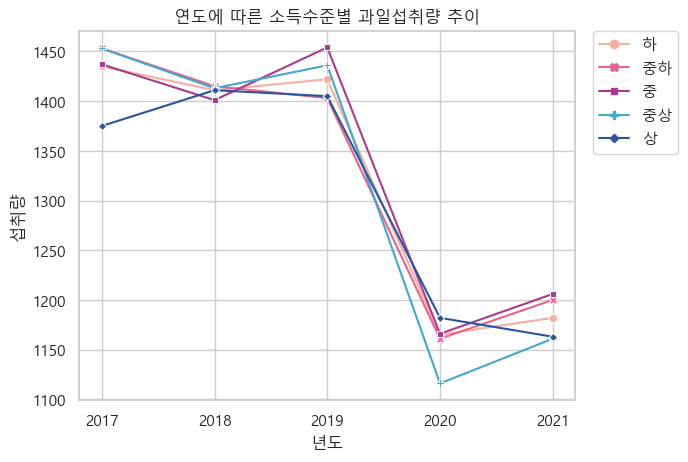

In [976]:
df2_copy = df2.T # x축 y축 치환
colors = [ '#f4aea3', '#e8638b', '#a73b8f','#44a7cb','#2a5599']  # 색상 리스트

# 그래프 그리기
sns.set(style='whitegrid', font='Malgun Gothic', font_scale=1)
ax = sns.lineplot(data=df2_copy, markers=True, dashes=False, palette=colors)  # 컬러 지정
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량', title='연도에 따른 소득수준별 과일섭취량 추이')
plt.show()

결과: <b>2020년도에 전 소득계층에서 과일 섭취량이 대폭 하락세</b>를 보였고, <b>2020년도에 소폭 상승세</b>를 보였다.

### [ 과일 섭취량이 많은 소득계층 순위 ]

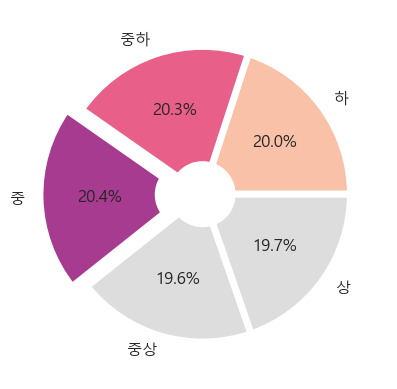

In [977]:
explode = [0, 0, 0.10, 0, 0]
colors = ['#f8c1a8', '#e8608a', '#a73b8f', '#ddd', '#ddd']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df2_copy.loc['2021'], labels=df2_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 중위계층이 20.4%로 1위, 중하위계층이 20.3%로 2위, 하위계층이 20.0%로 3위</b>

## 1-3. 성별 과일 섭취량 비교

In [978]:
# Excel 파일 읽기 : 남성 데이터
male_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=62,
                   nrows=8)

# 데이터프레임 확인
male_df.head()

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,766,166.2,(10.6),811,199.3,(9.5),615,90.3,...,(10.2),373,145.0,(11.6),273,133.6,(11.2),240,132.5,(13.0)
10-18,NaN,NaN,738,199.0,(13.7),696,180.1,(11.4),634,76.8,...,(11.6),334,84.4,(9.9),255,100.1,(26.7)*,259,98.2,(13.4)
19-29,NaN,NaN,707,188.3,(13.5),615,155.2,(12.2),451,73.2,...,(11.0),323,92.1,(13.6),292,63.1,(9.0),279,60.7,(8.9)
30-39,NaN,NaN,922,197.0,(12.1),857,182.4,(11.8),659,99.0,...,(11.9),384,91.5,(11.6),270,93.7,(12.5),232,71.8,(10.7)
40-49,NaN,NaN,720,161.6,(10.6),784,167.9,(15.1),731,73.3,...,(10.6),441,139.6,(10.0),348,123.6,(10.7),351,124.2,(15.0)


In [979]:
# Excel 파일 읽기 : 여성 데이터
female_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=109,
                   nrows=8)

# 데이터프레임 확인
female_df.head()

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,693,188.9,(12.7),695,172.9,(10.0),584,93.5,...,(10.0),363,133.2,(11.1),262,110.5,(12.7),243,126.1,(11.2)
10-18,NaN,NaN,702,194.7,(12.5),674,195.2,(13.3),571,92.0,...,(12.5),305,109.0,(10.3),214,88.5,(10.2),225,106.4,(14.6)
19-29,NaN,NaN,843,246.6,(13.8),755,243.7,(15.4),594,108.3,...,(7.6),346,80.8,(7.7),332,70.6,(9.7),305,68.2,(7.9)
30-39,NaN,NaN,944,260.2,(12.5),948,266.7,(13.0),807,123.3,...,(16.8),471,130.4,(9.4),363,116.2,(10.8),317,95.5,(10.1)
40-49,NaN,NaN,741,245.8,(11.7),817,273.0,(14.8),828,104.7,...,(9.1),595,191.9,(34.6),459,163.8,(13.4),459,132.2,(9.8)


In [980]:
# 2012~2021 남성 섭취 데이터만 수집
male_data=male_df.drop([0,1], axis=1)
male_data=male_data.iloc[:,24::3]

# 2021 남성 섭취 데이터만 수집
male_data = male_data.iloc[:,9]
male_data

2
 1-9      240
 10-18    259
 19-29    279
 30-39    232
 40-49    351
 50-59    370
 60-69    414
 70+      494
Name: 54, dtype: int64

In [981]:
# 2012~2021 여성 섭취 데이터만 수집
female_data=female_df.drop([0,1], axis=1)
female_data=female_data.iloc[:,24::3]

# 2021 여성 섭취 데이터만 수집
female_data = female_data.iloc[:,9]
female_data

2
 1-9      243
 10-18    225
 19-29    305
 30-39    317
 40-49    459
 50-59    539
 60-69    567
 70+      646
Name: 54, dtype: int64

In [982]:
total = {'여성':female_data, '남성':male_data}
total_data = pd.DataFrame(total)
total_data

,여성,남성
2,,
1-9,243,240
10-18,225,259
19-29,305,279
30-39,317,232
40-49,459,351
50-59,539,370
60-69,567,414
70+,646,494


In [983]:
total_data.index=['10대 미만','10대','20대','30대','40대','50대','60대','70대 이상'] # 인덱스명 변경

In [984]:
total_data_copy = total_data.T # x축 y축 치환

### [ 성별 과일 섭취량 비교 ]

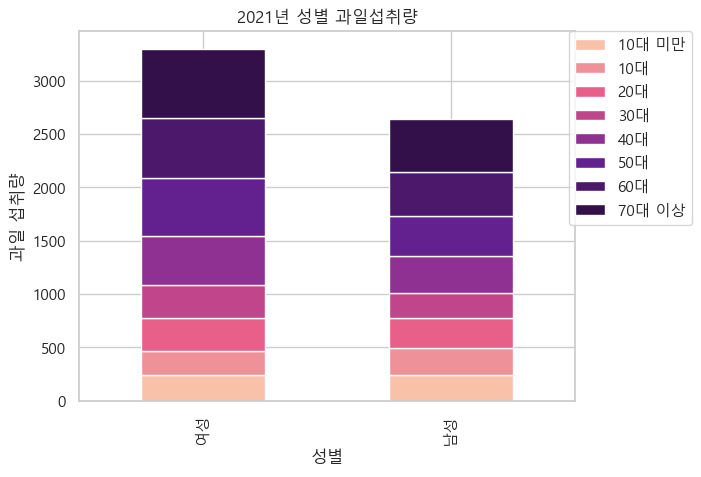

In [985]:
colors = ['#f8c1a8', '#ef9198', '#e8608a', '#c0458a', '#8f3192', '#63218f', '#4b186c', '#33104a' ]
total_data_copy.plot(kind='bar', stacked=True, color=colors)
plt.title('2021년 성별 과일섭취량')
plt.xlabel('성별')
plt.ylabel('과일 섭취량')

# 범례 위치와 레이아웃 조정
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()

<b>결과: 여성의 과일 섭취량이 남성의 과일 섭취량 보다 많은것으로 나타났으며, 연령대가 높아질 수록 그 폭이 상승했다.</b>

# 2. 과일 가격변화와 과일 섭취량의 상관 관계 분석

## ※ 데이터 준비
[ 과일 가격 정보 ] <br>
자료명 : 연도별 도.소매가격정보 OPEN-API  <br> 

[ 물가상승률 ]
자료명 : 소비자물가총지수와 주요 품목별 소비자물가상승률 <br>
파일명 : 물가상승률.xlsx <br>
단위 : 2020=100, %
소비자물가상승률 = {(당해년도 연간소비자물가지수 ÷ 직전 연간소비자물가지수) - 1} × 100.

## ※ 패키지 설치 및 로드

In [3]:
import requests
import xml.etree.ElementTree as ET
import pprint
import numpy as np

## 2-1. 과일별 가격 변동 추이

In [4]:
# 부류코드
code_categories = [400]  # 200:채소류, 400: 과일류

# 품종별 등급코드
code_product = {
    221: ['00'],
    226: ['00'],
    411: ['01', '05', '06', '07'],
    412: ['01', '02', '03', '04'],
    413: ['01', '04', '05'],
    414: ['01', '02', '03', '06', '07', '08', '09', '10', '11', '12'],
    415: ['00', '01', '02']
}
# 221: 수박, 226: 딸기, 411: 사과, 412: 배, 413: 복숭아, 414: 포도, 415: 감귤

# API 요청 보내기
base_url = 'http://www.kamis.or.kr/service/price/xml.do?action=monthlySalesList'
p_cert_key = 'a667632f-857f-40c5-805c-6ee126d7a1f4'
p_cert_id = 3772
p_yyyy = 2021
p_period = 4
p_countycode = 1101
p_convert_kg_yn = 'N'

dfset = pd.DataFrame()  # 빈 데이터프레임

for code_category in code_categories:
    for item_code, kind_codes in code_product.items():
        for kind_code in kind_codes: # 품종별 등급코드 순회
            for rank_code in range(1, 6): # 품종 순회
                try:
                    # 요청
                    response = requests.get(
                        f'{base_url}&p_yyyy={p_yyyy}&p_period={p_period}&p_itemcategorycode={code_category}&p_itemcode={item_code}&p_kindcode={kind_code}&p_graderank={rank_code}&p_countycode={p_countycode}&p_convert_kg_yn={p_convert_kg_yn}&p_cert_key={p_cert_key}&p_cert_id={p_cert_id}&p_returntype=xml'
                    )
                    # 응답 처리
                    if response.status_code == 200:                
                        # XML 파싱
                        root = ET.fromstring(response.content)

                        # 데이터 추출
                        data_list = []
                        for price_elem in root.findall('price'):
                            try:
                                productclscode = price_elem.find('productclscode').text
                            except AttributeError:
                                continue  # productclscode가 없는 경우 스킵

                            caption = price_elem.find('caption').text
                            for item_elem in price_elem.findall('item'):
                                temp_dict = {'caption': caption}
                                for child in item_elem:
                                    temp_dict[child.tag] = child.text
                                data_list.append(temp_dict)

                        # 판다스 데이터프레임으로 변환
                        df = pd.DataFrame(data_list)
                        if dfset.empty:
                            print(df)
                            # 첫 데이터
                            dfset = df 
                        else:
                            # 첫 데이터 이후부터는 이어붙임
                            if df.empty:
                                continue  # 빈 데이터일때 스킵            
                            print(df)                
                            dfset = pd.concat([dfset, df], axis=0, join='outer', ignore_index=True)
                    else:
                        print('Error occurred:', response.status_code)

                except requests.exceptions.RequestException as e:
                    print('Request failed:', e)
                except Exception as e:
                    print('An error occurred:', e)

                               caption  yyyy      m1      m2      m3      m4  \
0  중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2017  14,050  19,875  17,409  15,000   
1  중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2018  12,568  18,056  19,333  18,286   
2  중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2019  23,136  19,647  16,500  18,227   
3  중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2020  19,150  20,500  18,545  17,550   
4  중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2021   7,270  12,878  19,827  18,300   
5       소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2017  21,248  27,203  25,246  17,299   
6       소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2018  16,863  25,196  24,340  21,588   
7       소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2019  29,276  27,182  20,498  19,299   
8       소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2020  27,996  27,980  26,065  21,554   
9       소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개  2021  17,601  20,367  21,328  21,890   

       m5      m6      m7      m8      m9     m10     m11     m12 yearavg  
0  17,842  16,595  17,714  19,000  12,714  

                                       caption  yyyy m1 m2 m3 m4 m5 m6  \
0  중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2017  -  -  -  -  -  -   
1  중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2018  -  -  -  -  -  -   
2  중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2019  -  -  -  -  -  -   
3  중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2020  -  -  -  -  -  -   
4  중도매인 판매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10kg  2021  -  -  -  -  -  -   
5        소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2017  -  -  -  -  -  -   
6        소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2018  -  -  -  -  -  -   
7        소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2019  -  -  -  -  -  -   
8        소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2020  -  -  -  -  -  -   
9        소매가격 > 과일류 > 사과 > 쓰가루(아오리) > 상품 > 10개  2021  -  -  -  -  -  -   

       m7      m8      m9 m10 m11 m12 yearavg  
0       -  33,278       -   -   -   -  33,278  
1  39,000  43,727       -   -   -   -  43,333  
2  35,667  29,952       -   -   -   -  30

                                caption  yyyy m1 m2 m3 m4 m5 m6 m7      m8  \
0  중도매인 판매가격 > 과일류 > 배 > 원황 > 상품 > 15kg  2017  -  -  -  -  -  -  -  42,667   
1  중도매인 판매가격 > 과일류 > 배 > 원황 > 상품 > 15kg  2018  -  -  -  -  -  -  -  53,400   
2  중도매인 판매가격 > 과일류 > 배 > 원황 > 상품 > 15kg  2019  -  -  -  -  -  -  -  41,357   
3  중도매인 판매가격 > 과일류 > 배 > 원황 > 상품 > 15kg  2020  -  -  -  -  -  -  -  47,238   
4  중도매인 판매가격 > 과일류 > 배 > 원황 > 상품 > 15kg  2021  -  -  -  -  -  -  -  60,463   
5        소매가격 > 과일류 > 배 > 원황 > 상품 > 10개  2017  -  -  -  -  -  -  -  26,602   
6        소매가격 > 과일류 > 배 > 원황 > 상품 > 10개  2018  -  -  -  -  -  -  -  23,961   
7        소매가격 > 과일류 > 배 > 원황 > 상품 > 10개  2019  -  -  -  -  -  -  -  31,618   
8        소매가격 > 과일류 > 배 > 원황 > 상품 > 10개  2020  -  -  -  -  -  -  -  27,408   
9        소매가격 > 과일류 > 배 > 원황 > 상품 > 10개  2021  -  -  -  -  -  -  -  33,500   

       m9 m10 m11 m12 yearavg  
0  35,294   -   -   -  37,846  
1  43,083   -   -   -  46,118  
2  28,462   -   -   -  35,148  
3  47,133   -

                                 caption  yyyy m1 m2 m3 m4 m5 m6 m7 m8  \
0  중도매인 판매가격 > 과일류 > 포도 > MBA > L과 > 5kg  2017  -  -  -  -  -  -  -  -   
1  중도매인 판매가격 > 과일류 > 포도 > MBA > L과 > 5kg  2018  -  -  -  -  -  -  -  -   
2  중도매인 판매가격 > 과일류 > 포도 > MBA > L과 > 5kg  2019  -  -  -  -  -  -  -  -   
3  중도매인 판매가격 > 과일류 > 포도 > MBA > L과 > 5kg  2020  -  -  -  -  -  -  -  -   
4  중도매인 판매가격 > 과일류 > 포도 > MBA > L과 > 5kg  2021  -  -  -  -  -  -  -  -   
5       소매가격 > 과일류 > 포도 > MBA > L과 > 1kg  2017  -  -  -  -  -  -  -  -   
6       소매가격 > 과일류 > 포도 > MBA > L과 > 1kg  2018  -  -  -  -  -  -  -  -   
7       소매가격 > 과일류 > 포도 > MBA > L과 > 1kg  2019  -  -  -  -  -  -  -  -   
8       소매가격 > 과일류 > 포도 > MBA > L과 > 1kg  2020  -  -  -  -  -  -  -  -   
9       소매가격 > 과일류 > 포도 > MBA > L과 > 1kg  2021  -  -  -  -  -  -  -  -   

       m9     m10     m11 m12 yearavg  
0  18,000  18,125  18,000   -  18,050  
1  22,400  19,238  18,000   -  19,455  
2  14,667  14,286  13,071   -  13,927  
3       -  15,150       -

                                 caption  yyyy      m1      m2      m3 m4 m5  \
0  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10kg  2017  21,700  42,250  58,000  -  -   
1  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10kg  2018  24,500       -       -  -  -   
2        소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개  2017   2,963   4,551   6,747  -  -   
3        소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개  2018   3,129       -       -  -  -   

  m6 m7 m8 m9     m10     m11     m12 yearavg  
0  -  -  -  -  24,750  19,455  20,737  26,463  
1  -  -  -  -       -       -       -  24,500  
2  -  -  -  -   3,559   2,812   2,771   3,728  
3  -  -  -  -       -       -       -   3,129  
                                 caption  yyyy      m1      m2      m3 m4 m5  \
0  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 중품 > 10kg  2017  18,700  36,750  50,000  -  -   
1  중도매인 판매가격 > 과일류 > 감귤 > 감귤 > 중품 > 10kg  2018  19,500       -       -  -  -   
2        소매가격 > 과일류 > 감귤 > 감귤 > 중품 > 10개  2017   2,355   3,194   4,670  -  -   
3        소매가격 > 과일류 > 감귤 > 감귤 > 중품 > 10

In [5]:
dfset.shape

(297, 15)

In [6]:
# 처음 5개 데이터
dfset.head()

,caption,yyyy,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,yearavg
0,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2017,"14,050","19,875","17,409","15,000","17,842","16,595","17,714","19,000","12,714","11,188","9,864","10,526","15,235"
1,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2018,"12,568","18,056","19,333","18,286","19,650","17,000","19,727","28,136","24,882","17,000","13,000","17,895","18,715"
2,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2019,"23,136","19,647","16,500","18,227","19,857","17,000","19,565","18,857","15,368","17,571","18,619","18,500","18,626"
3,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2020,"19,150","20,500","18,545","17,550","16,868","18,209","19,283","22,020","20,824","7,142","9,400","7,967","16,511"
4,중도매인 판매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2021,"7,270","12,878","19,827","18,300","18,558","15,491","20,350","19,410","14,211","11,000","15,586","18,114","16,069"


In [7]:
# 도매가 제거
mask1= dfset['caption'].str.contains('소매가격')
filter_df = dfset.loc[mask1, :]

In [8]:
filter_df.shape

(145, 15)

In [9]:
# 데이터 타입 확인
print(filter_df.dtypes)

caption    object
yyyy       object
m1         object
m2         object
m3         object
m4         object
m5         object
m6         object
m7         object
m8         object
m9         object
m10        object
m11        object
m12        object
yearavg    object
dtype: object


In [10]:
# 데이터 타입 변경을 위해 숫자가 아닌 데이터 삭제
filter_df.loc[:, 'm1':'yearavg'] = filter_df.loc[:, 'm1':'yearavg'].apply(lambda x: x.str.replace(',', ''))
filter_df.head()

C:\Users\dawoo\AppData\Local\Temp\ipykernel_54604\1593338263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df.loc[:, 'm1':'yearavg'] = filter_df.loc[:, 'm1':'yearavg'].apply(lambda x: x.str.replace(',', ''))


,caption,yyyy,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,yearavg
5,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2017,21248,27203,25246,17299,18898,17791,18110,19887,17365,15715,14146,13386,18941
6,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2018,16863,25196,24340,21588,20079,16828,18364,28458,27412,20737,17112,20221,21322
7,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2019,29276,27182,20498,19299,19467,17246,18605,18259,18347,21823,24592,26367,21704
8,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2020,27996,27980,26065,21554,17803,16237,19295,19942,24763,18314,16747,16387,21077
9,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2021,17601,20367,21328,21890,17456,17876,19679,23890,19832,20934,21946,29087,20991


In [11]:
# 컬렴명 변경
filter_df = filter_df.rename(columns={'caption':'과일이름', 'yyyy':'년도','m1':'1월', 'm2':'2월', 'm3':'3월', 'm4':'4월', 'm5':'5월', 'm6':'6월', 
                              'm7':'7월', 'm8':'8월', 'm9':'9월', 'm10':'10월', 'm11':'11월', 'm12':'12월', 'yearavg':'연평균가'})

In [12]:
# 변경된 데이터 타입 확인
print(filter_df.dtypes)

과일이름    object
년도      object
1월      object
2월      object
3월      object
4월      object
5월      object
6월      object
7월      object
8월      object
9월      object
10월     object
11월     object
12월     object
연평균가    object
dtype: object


In [13]:
filter_df

,과일이름,년도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균가
5,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2017,21248,27203,25246,17299,18898,17791,18110,19887,17365,15715,14146,13386,18941
6,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2018,16863,25196,24340,21588,20079,16828,18364,28458,27412,20737,17112,20221,21322
7,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2019,29276,27182,20498,19299,19467,17246,18605,18259,18347,21823,24592,26367,21704
8,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2020,27996,27980,26065,21554,17803,16237,19295,19942,24763,18314,16747,16387,21077
9,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2021,17601,20367,21328,21890,17456,17876,19679,23890,19832,20934,21946,29087,20991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2019,-,5403,5392,-,-,-,-,-,-,6089,-,-,5677
289,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2020,-,6737,6488,-,-,-,-,-,-,7076,-,-,6773
290,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2021,-,-,5832,7828,-,-,9321,8846,8742,7452,-,-,8077
295,소매가격 > 과일류 > 감귤 > 시설 > S과 > 10개,2020,-,4750,4864,-,-,-,-,-,-,5442,5900,-,5211


In [14]:
# '-'를 NaN으로 치환
filter_df_copy = filter_df.replace('-', np.nan)

In [15]:
# 누락데이터 확인
filter_df_copy.isnull().sum()

과일이름      0
년도        0
1월       87
2월       85
3월       90
4월       98
5월       99
6월      108
7월       85
8월       55
9월       58
10월      57
11월      74
12월      87
연평균가      0
dtype: int64

In [16]:
filter_df_copy

,과일이름,년도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균가
5,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2017,21248,27203,25246,17299,18898,17791,18110,19887,17365,15715,14146,13386,18941
6,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2018,16863,25196,24340,21588,20079,16828,18364,28458,27412,20737,17112,20221,21322
7,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2019,29276,27182,20498,19299,19467,17246,18605,18259,18347,21823,24592,26367,21704
8,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2020,27996,27980,26065,21554,17803,16237,19295,19942,24763,18314,16747,16387,21077
9,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2021,17601,20367,21328,21890,17456,17876,19679,23890,19832,20934,21946,29087,20991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2019,NaN,5403,5392,NaN,NaN,NaN,NaN,NaN,NaN,6089,NaN,NaN,5677
289,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2020,NaN,6737,6488,NaN,NaN,NaN,NaN,NaN,NaN,7076,NaN,NaN,6773
290,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2021,NaN,NaN,5832,7828,NaN,NaN,9321,8846,8742,7452,NaN,NaN,8077
295,소매가격 > 과일류 > 감귤 > 시설 > S과 > 10개,2020,NaN,4750,4864,NaN,NaN,NaN,NaN,NaN,NaN,5442,5900,NaN,5211


In [17]:
filter_df_copy.loc[:, '1월':'12월'] = filter_df_copy.loc[:, '1월':'12월'].apply(pd.to_numeric, errors='coerce')

# 유효한 값의 평균 계산
valid_mean_values = filter_df_copy.loc[:, '1월':'12월'].mean(axis=1, skipna=True)

print(valid_mean_values)

5      18857.833333
6      21433.166667
7      21746.750000
8      21090.250000
9      20990.500000
           ...     
288     5628.000000
289     6767.000000
290     8003.500000
295     5239.000000
296     6043.400000
Length: 145, dtype: float64


In [18]:
# NaN 값을 유효한 값의 평균값으로 대체
for i, mean_value in enumerate(valid_mean_values):
    row_values = filter_df_copy.iloc[i, :]
    for j in range(len(row_values)):
        if pd.isnull(row_values[j]):
            filter_df_copy.iloc[i, j] = mean_value

In [19]:
filter_df_copy

,과일이름,년도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균가
5,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2017,21248.0,27203.0,25246.0,17299.0,18898.0,17791.0,18110.0,19887.0,17365.0,15715.0,14146.0,13386.0,18941
6,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2018,16863.0,25196.0,24340.0,21588.0,20079.0,16828.0,18364.0,28458.0,27412.0,20737.0,17112.0,20221.0,21322
7,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2019,29276.0,27182.0,20498.0,19299.0,19467.0,17246.0,18605.0,18259.0,18347.0,21823.0,24592.0,26367.0,21704
8,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2020,27996.0,27980.0,26065.0,21554.0,17803.0,16237.0,19295.0,19942.0,24763.0,18314.0,16747.0,16387.0,21077
9,소매가격 > 과일류 > 수박 > 수박 > 상품 > 1개,2021,17601.0,20367.0,21328.0,21890.0,17456.0,17876.0,19679.0,23890.0,19832.0,20934.0,21946.0,29087.0,20991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2019,5628.0,5403.0,5392.0,5628.0,5628.0,5628.0,5628.0,5628.0,5628.0,6089.0,5628.0,5628.0,5677
289,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2020,6767.0,6737.0,6488.0,6767.0,6767.0,6767.0,6767.0,6767.0,6767.0,7076.0,6767.0,6767.0,6773
290,소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,2021,8003.5,8003.5,5832.0,7828.0,8003.5,8003.5,9321.0,8846.0,8742.0,7452.0,8003.5,8003.5,8077
295,소매가격 > 과일류 > 감귤 > 시설 > S과 > 10개,2020,5239.0,4750.0,4864.0,5239.0,5239.0,5239.0,5239.0,5239.0,5239.0,5442.0,5900.0,5239.0,5211


In [20]:
# 데이터 타입 변경
filter_df_copy = filter_df_copy.astype({'1월':'int', '2월':'int', '3월':'int', '4월':'int', '5월':'int', '6월':'int', 
                              '7월':'int', '8월':'int', '9월':'int', '10월':'int', '11월':'int', '12월':'int', '연평균가':'int'})

In [21]:
# 과일이름으로 그룹화
filter_df_copy.groupby('과일이름').count().sort_index()

,년도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균가
과일이름,,,,,,,,,,,,,,
소매가격 > 과일류 > 감귤 > 감귤 > 상품 > 10개,2,2,2,2,2,2,2,2,2,2,2,2,2,2
소매가격 > 과일류 > 감귤 > 감귤 > 중품 > 10개,2,2,2,2,2,2,2,2,2,2,2,2,2,2
소매가격 > 과일류 > 감귤 > 노지 > M과 > 10개,4,4,4,4,4,4,4,4,4,4,4,4,4,4
소매가격 > 과일류 > 감귤 > 노지 > S과 > 10개,4,4,4,4,4,4,4,4,4,4,4,4,4,4
소매가격 > 과일류 > 감귤 > 시설 > M과 > 10개,4,4,4,4,4,4,4,4,4,4,4,4,4,4
소매가격 > 과일류 > 감귤 > 시설 > S과 > 10개,2,2,2,2,2,2,2,2,2,2,2,2,2,2
소매가격 > 과일류 > 딸기 > 딸기 > 상품 > 100g,5,5,5,5,5,5,5,5,5,5,5,5,5,5
소매가격 > 과일류 > 딸기 > 딸기 > 중품 > 100g,5,5,5,5,5,5,5,5,5,5,5,5,5,5
소매가격 > 과일류 > 배 > 신고 > 상품 > 10개,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [22]:
# 단위 확인
filter_df_copy.loc[filter_df['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '1월':'연평균가']

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균가
193,11483,11483,11483,11483,11483,11483,13000,12430,10253,10249,11483,11483,11456
194,14053,14053,14053,14053,14053,15600,16491,12483,11727,13964,14053,14053,13882
195,10795,10795,10795,10795,10795,10795,10795,10795,11879,10341,10167,10795,10934
196,20660,20660,20660,20660,20660,20660,20660,20660,20660,20660,20660,20660,20660
197,21382,21382,21382,21382,21382,21382,26862,19440,17845,21382,21382,21382,20966


In [24]:
# 2kg -> 1kg로 단위 맞추기
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '1월':'연평균가'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '1월':'연평균가']/2
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > L과 > 2kg', '1월':'연평균가'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > L과 > 2kg', '1월':'연평균가']/2
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > M과 > 2kg', '1월':'연평균가'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > M과 > 2kg', '1월':'연평균가']/2
filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > L과 > 2kg', '1월':'연평균가'] = filter_df_copy.loc[filter_df_copy['과일이름'] == '소매가격 > 과일류 > 포도 > 샤인머스켓 > L과 > 2kg', '1월':'연평균가']/2

In [25]:
# 단위 확인
filter_df_copy.loc[filter_df['과일이름'] == '소매가격 > 과일류 > 포도 > 거봉 > M과 > 2kg', '1월':'연평균가']

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균가
193,2870.75,2870.75,2870.75,2870.75,2870.75,2870.75,3250.00,3107.50,2563.25,2562.25,2870.75,2870.75,2864.0
194,3513.25,3513.25,3513.25,3513.25,3513.25,3900.00,4122.75,3120.75,2931.75,3491.00,3513.25,3513.25,3470.5
195,2698.75,2698.75,2698.75,2698.75,2698.75,2698.75,2698.75,2698.75,2969.75,2585.25,2541.75,2698.75,2733.5
196,5165.00,5165.00,5165.00,5165.00,5165.00,5165.00,5165.00,5165.00,5165.00,5165.00,5165.00,5165.00,5165.0
197,5345.50,5345.50,5345.50,5345.50,5345.50,5345.50,6715.50,4860.00,4461.25,5345.50,5345.50,5345.50,5241.5


In [26]:
# 과일 이름 추출
filter_df_copy['과일이름'] = filter_df_copy['과일이름'].str.split('>').str[2]

In [27]:
filter_df_copy

,과일이름,년도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균가
5,수박,2017,21248.0,27203.0,25246.0,17299.0,18898.0,17791.0,18110.0,19887.0,17365.0,15715.0,14146.0,13386.0,18941.0
6,수박,2018,16863.0,25196.0,24340.0,21588.0,20079.0,16828.0,18364.0,28458.0,27412.0,20737.0,17112.0,20221.0,21322.0
7,수박,2019,29276.0,27182.0,20498.0,19299.0,19467.0,17246.0,18605.0,18259.0,18347.0,21823.0,24592.0,26367.0,21704.0
8,수박,2020,27996.0,27980.0,26065.0,21554.0,17803.0,16237.0,19295.0,19942.0,24763.0,18314.0,16747.0,16387.0,21077.0
9,수박,2021,17601.0,20367.0,21328.0,21890.0,17456.0,17876.0,19679.0,23890.0,19832.0,20934.0,21946.0,29087.0,20991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,감귤,2019,5628.0,5403.0,5392.0,5628.0,5628.0,5628.0,5628.0,5628.0,5628.0,6089.0,5628.0,5628.0,5677.0
289,감귤,2020,6767.0,6737.0,6488.0,6767.0,6767.0,6767.0,6767.0,6767.0,6767.0,7076.0,6767.0,6767.0,6773.0
290,감귤,2021,8003.0,8003.0,5832.0,7828.0,8003.0,8003.0,9321.0,8846.0,8742.0,7452.0,8003.0,8003.0,8077.0
295,감귤,2020,5239.0,4750.0,4864.0,5239.0,5239.0,5239.0,5239.0,5239.0,5239.0,5442.0,5900.0,5239.0,5211.0


In [28]:
# 년도 고유값 확인
filter_df_copy['년도'].unique()

array(['2017', '2018', '2019', '2020', '2021'], dtype=object)

In [30]:
# 그룹별 년도 평균가격
result = filter_df_copy.groupby(['과일이름', '년도']).mean().round(2)
result

1월        2월        3월        4월        5월        6월  \
과일이름  년도                                                                 
 감귤   2017   2659.00   3872.50   5708.50   3420.50   3420.50   3420.50   
      2018   3434.20   3706.60   3469.40   3454.20   3454.20   3454.20   
      2019   3664.33   3680.00   3555.67   3634.33   3634.33   3634.33   
      2020   4105.75   3980.75   4117.50   4281.00   4281.00   4281.00   
      2021   4751.00   4968.25   3751.75   4780.50   4824.25   4824.25   
 딸기   2017   1335.00   1029.00    813.00    784.00    788.50   1108.50   
      2018   1339.50   1183.50    857.50    808.50    806.50   1086.00   
      2019   1230.50    970.00    819.00    757.00    883.50   1037.00   
      2020   1542.50   1105.00    902.50    853.00    847.00   1100.00   
      2021   1404.00   1263.00    897.00    775.00    760.50   1222.50   
 배    2017  22770.50  22446.25  22815.00  23248.50  23761.50  26507.25   
      2018  22520.25  22802.25  23094.25  23027.00  22734.75  22583.00   
      2019  28023.00  28927.25  28684.00  28807.00  29583.50  29752.75   
      2020  24198.00  24976.25  24591.25  24332.25  24091.50  24166.75   
      2021  33450.75  34706.50  35577.00  34683.25  33892.50  34624.25   
 복숭아  2017  15845.00  15845.00  15845.00  15845.00  15845.00  15845.00   
      2018  18101.50  18101.50  18101.50  18101.50  18101.50  18101.50   
      2019  15710.00  15710.00  15710.00  15710.00  15710.00  15710.00   
      2020  16736.00  16736.00  16736.00  16736.00  16736.00  16736.00   
      2021  22136.00  22136.00  22136.00  22136.00  22136.00  22136.00   
 사과   2017  16240.50  16337.50  15951.50  16063.17  16187.50  16547.83   
      2018  18789.17  19089.17  19123.17  18815.83  18454.50  18555.00   
      2019  18071.67  18645.33  18486.50  18790.83  18815.67  18814.50   
      2020  18499.33  18898.67  18875.17  19054.83  19625.17  19879.83   
      2021  22108.67  23121.00  22634.83  23170.67  22922.17  22769.00   
 수박   2017  20344.00  25436.00  23650.50  16275.00  17231.00  16525.50   
      2018  15906.00  23512.00  22482.50  19901.00  18209.50  15458.50   
      2019  27835.50  26127.50  18911.00  18462.00  17686.00  15848.50   
      2020  25907.00  26426.50  24689.50  20022.00  16570.00  14833.50   
      2021  16832.00  19412.50  21137.00  20696.00  16099.50  16551.50   
 포도   2017   4669.11   4725.82   4656.68   4707.82   4643.54   4748.54   
      2018   6176.58   6168.47   6166.69   6159.14   6118.92   6274.33   
      2019   5835.98   5767.90   5830.65   5901.65   5870.90   5828.23   
      2020   7132.88   7137.48   7128.28   7143.68   7112.48   7144.88   
      2021   7554.20   7565.43   7649.27   7661.18   7636.91   7632.00   

                  7월        8월        9월       10월       11월       12월  \
과일이름  년도                                                                 
 감귤   2017   3420.50   3420.50   3420.50   3109.00   2614.50   2561.00   
      2018   3454.20   3454.20   3454.20   3330.40   3458.00   3327.80   
      2019   3634.33   3634.33   3634.33   4002.33   3532.00   3374.00   
      2020   4281.00   4281.00   4281.00   4734.50   4513.75   4235.75   
      2021   5486.00   5236.00   5103.75   4591.50   4838.25   4738.00   
 딸기   2017   1108.50   1108.50   1108.50   1108.50   1616.50   1398.00   
      2018   1086.00   1086.00   1086.00   1086.00   1086.00   1523.00   
      2019   1037.00   1037.00   1037.00   1037.00   1037.00   1562.50   
      2020   1100.00   1100.00   1100.00   1100.00   1100.00   1352.00   
      2021   1222.50   1222.50   1222.50   1222.50   1487.50   1972.00   
 배    2017  29047.50  29921.25  22043.25  22786.50  21057.25  21258.25   
      2018  22820.00  21829.75  25990.25  24576.00  24834.75  25655.00   
      2019  31132.25  31590.00  26571.00  26709.00  25210.75  25132.25   
      2020  25024.50  24836.75  26239.25  26909.50  27036.75  28131.50   
      2021  36440.00  36560.50  31722.75  30343.50  28532.00  28549.00   
 복숭아  2017  17205.50 

In [31]:
# 과일 평균가격 변동
fruits = result.index.get_level_values(0).unique()
colum_names = result.columns

In [32]:
# 연평균가 열 제거
result_months = result.drop('연평균가', axis=1)

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) 

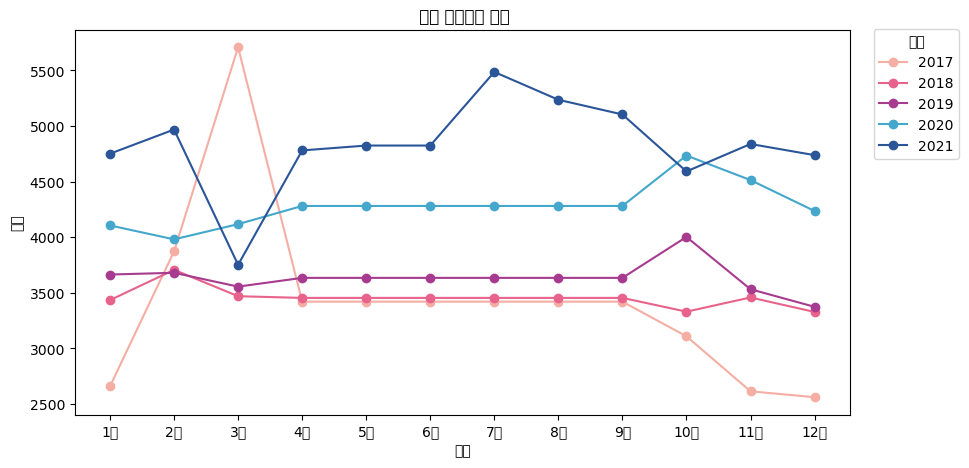

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46392 (\N{HANGUL SYLLABLE DDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) m

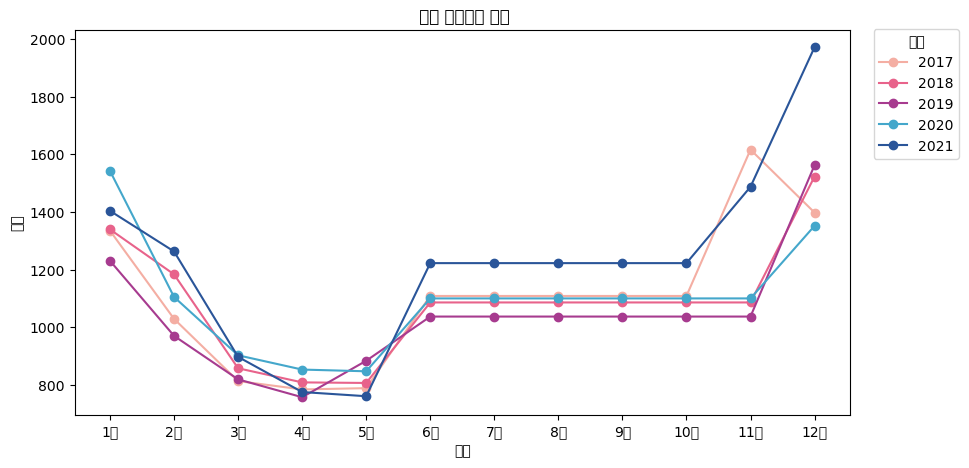

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG})

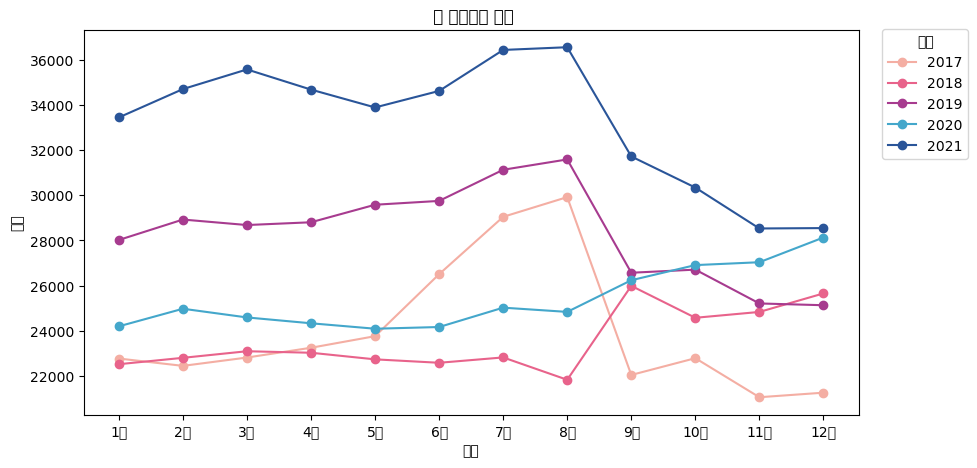

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49709 (\N{HANGUL SYLLABLE SUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) m

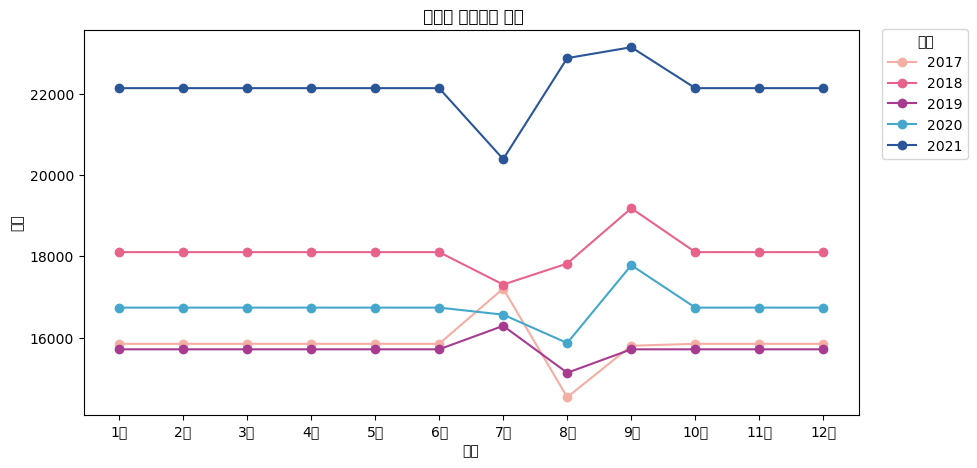

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) mi

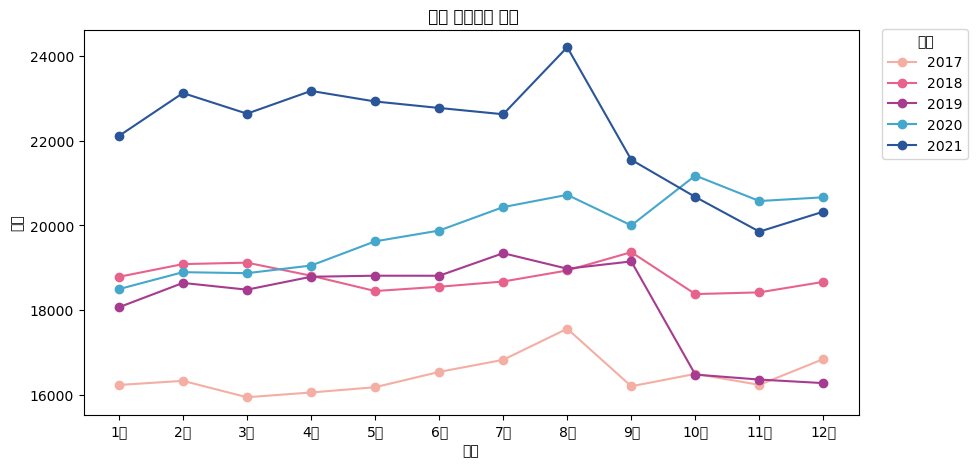

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) mi

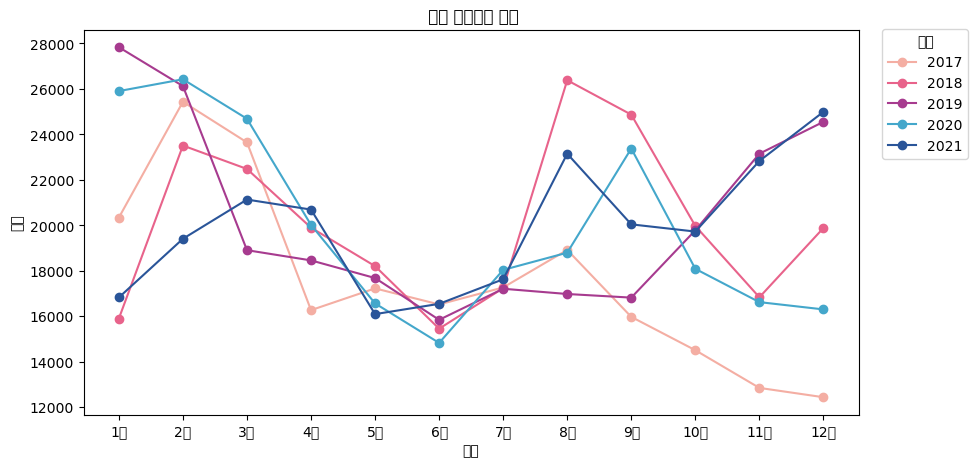

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) mis

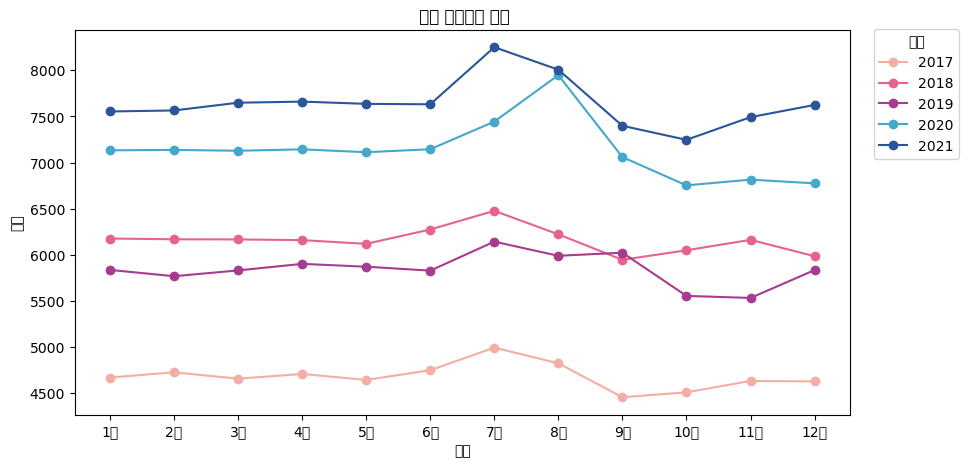

In [33]:
# 과일별 그래프 그리기
colors = [ '#f4aea3', '#e8638b', '#a73b8f', '#44a7cb', '#2a5599']  # 색상 리스트

for i, fruit in enumerate(fruits):
    fruit_df = result_months.xs(fruit, level='과일이름')
    fruit_df_transposed = fruit_df.T
    plt.figure(figsize=(10, 5))
    for j, column in enumerate(fruit_df_transposed.columns):
        plt.plot(fruit_df_transposed.index, fruit_df_transposed[column], marker='o', label=column, color=colors[j])

    plt.title(fruit+'평균가격 변동')
    plt.xlabel('년도')
    plt.ylabel('가격')
    plt.legend(title='년도', loc='upper right', bbox_to_anchor=(1.15, 1.02))
    plt.show()

결과 : 2019년 이후로 특정 월을 제외하면 전반적으로 가격이 상승하는 추세를 보였다. <br>
딸기 품목의 경우, 11월 ~ 12월까지는 가격이 상승하다가 1월 ~ 4월 사이 가격이 하락하는 추세였으며, <br>
수박 품목의 경우 5월 ~ 7월 사이 가격이 저렴해지는 양상을 보였다.

### [ 과일별 가격 변동 추이 ]

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) 

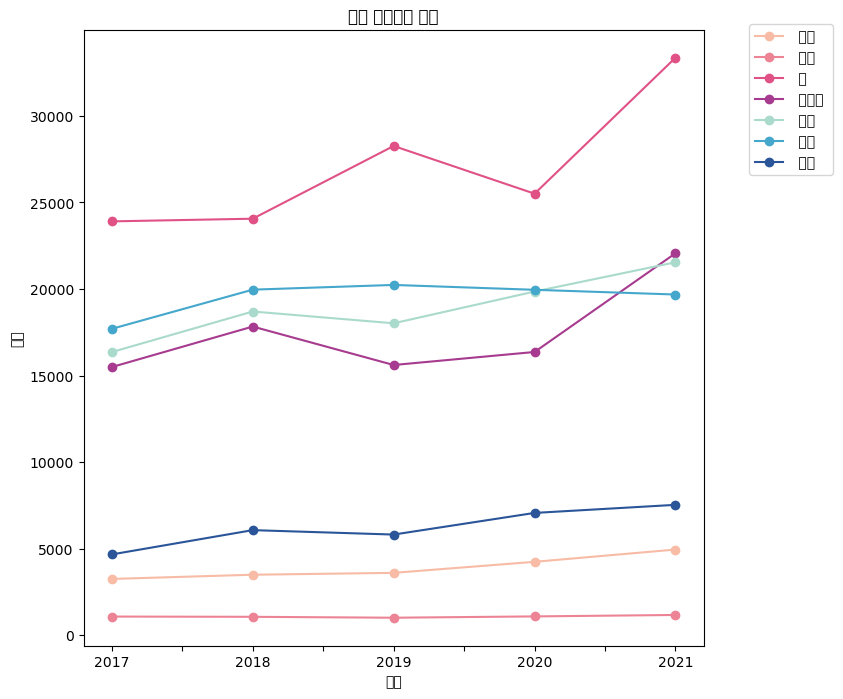

In [34]:
# 과일별 연평균가 변동추이 그래프 그리기
colors = ['#f7bba6', '#ed8495', '#e05286', '#a73b8f', '#aadacc', '#44a7cb', '#2a5599']  # 색상 리스트
for i, fruit in enumerate(fruits):
    fruit_df = result[colum_names[12]].xs(fruit, level='과일이름')
    fruit_df.plot(kind='line', marker='o', figsize=(8, 8), label=fruit, color=colors[i])

plt.title('과일 연평균가 변동')
plt.xlabel('년도')
plt.ylabel('가격')
plt.legend(title='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1.02))
plt.show()

결과: 감귤과 딸기의 가격변동은 크게 없었으며, 가장 큰 가격 변동을 보인 품목은 "배"이다.

## 2-2. 과일 가격과 식품 물가 상관 관계 분석

In [35]:
# 파일 경로와 시트명 설정
file_path2 = '물가상승률.xlsx' # 파일경로

# Excel 파일 읽기 : 연령별 데이터
price=pd.read_excel(file_path2,
                   header=2,
                   index_col = 0,
                   skipfooter=3)

# 데이터프레임 확인
price

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
소비자물가 총지수(2020=100),91.8,93.0,94.2,94.9,95.8,97.6,99.1,99.5,100.0,102.5
소비자물가상승률(%),2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,2.5
식료품/비주류음료,4.0,0.9,0.3,1.6,2.3,3.4,2.8,0.0,4.4,5.9
주류 및 담배,1.5,1.7,-0.1,50.1,0.7,1.5,0.3,0.6,0.3,0.4
의류 및 신발,4.8,2.9,4.0,1.3,1.8,1.1,1.1,0.1,0.7,0.6
주택 ·수도 · 전기 및 연료,4.6,3.5,2.9,-0.6,-0.8,1.7,0.7,1.2,0.5,1.6
가정용품 및 가사 서비스,2.9,0.3,2.1,2.6,1.6,1.1,2.3,2.1,0.0,1.9
보건,0.9,0.4,0.7,1.3,1.0,0.9,-0.1,0.5,1.5,-0.1
교통,3.2,-0.5,-1.6,-7.8,-2.2,3.6,2.4,-1.8,-1.8,6.3
통신,-2.6,-0.1,-0.1,-0.2,0.1,0.3,-0.9,-2.3,-2.1,-0.9


In [36]:
# 필요한 데이터만 추출
price_df = price.loc[['식료품/비주류음료'],'2017':]
price_df

,2017,2018,2019,2020,2021
식료품/비주류음료,3.4,2.8,0.0,4.4,5.9


In [37]:
# x축 y축 치환
price_df = price_df.T

In [38]:
# 컬럼명 변경
price_df = price_df.rename(columns={'식료품/비주류음료':'식품물가'})

C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) mis

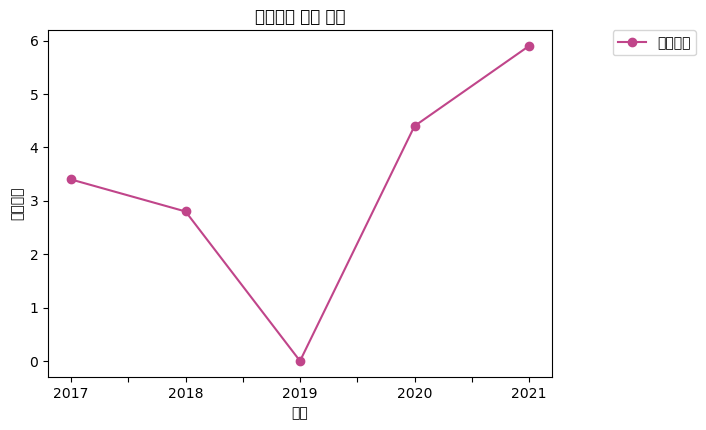

In [39]:
# 식품물가 변동 추이 그래프 그리기
price_df.plot(kind='line', marker='o', figsize=(6.5, 4.5), label=fruit, color='#c0458a')
plt.title('식품물가 변동 추이')
plt.xlabel('년도')
plt.ylabel('식품물가')
plt.legend(title='년도')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
plt.show()

In [41]:
# 과일의 연평균가와 물가를 한 데이터프레임에 배치
price_comp_df = price_df
for fruit in fruits:
    print(result.xs(fruit, level='과일이름')['연평균가'])
    price_comp_df[fruit] = result.xs(fruit, level='과일이름')['연평균가']

price_comp_df

년도
2017    3259.50
2018    3502.80
2019    3611.00
2020    4248.50
2021    4957.75
Name: 연평균가, dtype: float64
년도
2017    1087.5
2018    1072.5
2019    1020.0
2020    1096.0
2021    1179.0
Name: 연평균가, dtype: float64
년도
2017    23908.75
2018    24062.25
2019    28262.50
2020    25507.25
2021    33359.00
Name: 연평균가, dtype: float64
년도
2017    15496.5
2018    17834.5
2019    15614.0
2020    16366.0
2021    22065.0
Name: 연평균가, dtype: float64
년도
2017    16361.33
2018    18703.50
2019    18023.17
2020    19856.00
2021    21546.17
Name: 연평균가, dtype: float64
년도
2017    17703.5
2018    19965.0
2019    20238.0
2020    19957.0
2021    19684.5
Name: 연평균가, dtype: float64
년도
2017    4675.86
2018    6077.89
2019    5822.27
2020    7072.05
2021    7538.98
Name: 연평균가, dtype: float64


,식품물가,감귤,딸기,배,복숭아,사과,수박,포도
2017,3.4,3259.50,1087.5,23908.75,15496.5,16361.33,17703.5,4675.86
2018,2.8,3502.80,1072.5,24062.25,17834.5,18703.50,19965.0,6077.89
2019,0.0,3611.00,1020.0,28262.50,15614.0,18023.17,20238.0,5822.27
2020,4.4,4248.50,1096.0,25507.25,16366.0,19856.00,19957.0,7072.05
2021,5.9,4957.75,1179.0,33359.00,22065.0,21546.17,19684.5,7538.98


### [ 과일 가격과 물가 상관 관계 분석 ]

C:\Users\dawoo\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\dawoo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


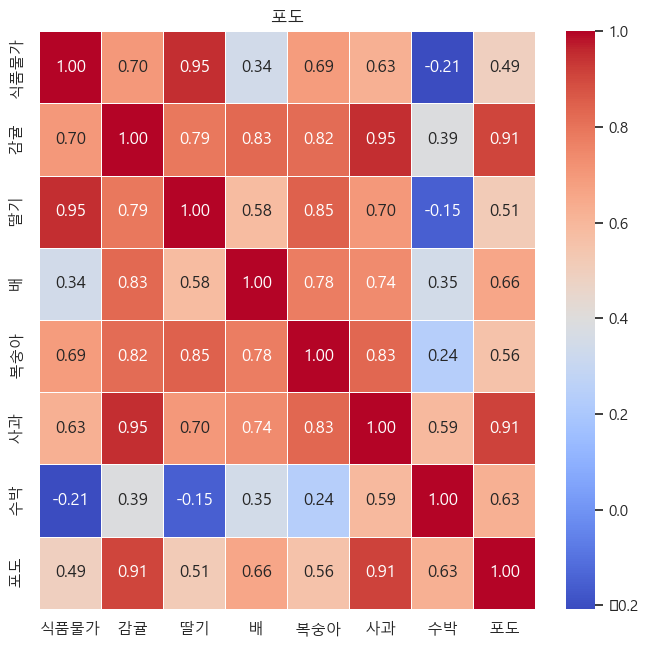

In [49]:
# 그래프 그리기
correlation_matrix = price_comp_df.corr()

# 히트맵
plt.figure(figsize=(8, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(fruit)
plt.show()

결과: 딸기의 경우 상관계수가 0.95로 관련이 높은 편이며, 감귤, 복숭아, 사과는 0.6 ~ 0,7 사이의 상관계수를 보였다. <br>
하지만 수박의 경우 음수의 결과를 보여 관련이 없는 편이다.

# 3. 과일별 판매량 분석

## 3-1. 홈플러스 크롤링

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [232]:
service = Service(executable_path="C:\chromedriver\chromedriver.exe")
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)

url = 'https://front.homeplus.co.kr/list?categoryId=100001&categoryDepth=1' #과일
driver.get(url)

time.sleep(3)

dataList = [] # 상품정보를 담을 리스트

def readData():
    # 데이터 읽어오기
    elements = driver.find_elements(By.CSS_SELECTOR, '.unitItemBox')
    for element in elements:
        try:
            fruitName = element.find_element(By.CSS_SELECTOR, '.css-12cdo53-defaultStyle-Typography-ellips').text
        except:
            fruitName = np.NaN
        try:
            monthly_purchase = element.find_element(By.XPATH, './/div[contains(@class, "prodScoreWrap")]/span[last()]').text
        except:
            monthly_purchase = np.NaN
        data = {'상품명': fruitName, '한달판매량': monthly_purchase}
        dataList.append(data)

cnt = 0
while True:
    readData() # 데이터 읽기
    next_page_buttons = driver.find_elements(By.CSS_SELECTOR, '.css-1ij9dss-number') # 현재 페이지를 제외한 페이징 버튼 수
    try:
        # cnt = cnt + 1
        # print(cnt,'페이지 출력완료')
        next_page_button = driver.find_element(By.CSS_SELECTOR, '.btnNext') # Next 버튼
        driver.execute_script("arguments[0].click();", next_page_button)
        time.sleep(1)  # 페이지가 로드되기를 기다림
    except Exception as e:
        print('No Next Button')
        for btn in next_page_buttons:
            # Next 버튼이 삭제 된 후의 처리(남은 pagination 클릭)
            # cnt = cnt + 1
            # print(cnt,'페이지 출력완료')
            driver.execute_script("arguments[0].click();", btn)
            time.sleep(1)  # 페이지가 로드되기를 기다림
            readData() # 데이터 읽기
        break
        
print('크롤링 끝', len(dataList), '개 데이터 수집 완료')

No Next Button
크롤링 끝 3643 개 데이터 수집 완료


In [233]:
df = pd.DataFrame(dataList)
df.tail()

df.to_csv('./fruits_info.csv') # csv 저장
print('csv 저장 완료')

csv 저장 완료


## 3-2. 품목별 판매량 시각화

In [234]:
df = pd.read_csv('./fruits_info.csv', encoding='utf-8', header=0, index_col=0)

print(df.shape)
df.head()

(3643, 2)


,상품명,한달판매량
0,올해 첫수확한 조생밀감 3KG(박스),"월 65,234개 구매"
1,신선농장 15Brix 샤인머스캣 1.2KG(박스),"월 45,692개 구매"
2,올해 첫수확한 타이벡밀감 2.8KG(박스),"월 41,424개 구매"
3,Dole 큰송이 바나나(필리핀) 개,"월 12,652개 구매"
4,대추방울토마토 1.2KG(박스),"월 19,678개 구매"


In [235]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

# 숫자 정제 함수 : 숫자 이외의 문자는 전부 제거
def num_cleaning(text):
    if pd.isna(text):  # NaN 값이면 0으로 대체
        return 0
    else:\
        # 숫자 정규표현식으로 숫자만 추출
        numbers = re.compile('[^0-9]+')
        result = numbers.sub('', text)
        return result

# 함수를 적용하여 상품명에서 한글만 추출
df['상품명'] = df['상품명'].apply(lambda x: text_cleaning(x))
df['한달판매량'] = df['한달판매량'].apply(lambda x: num_cleaning(x))

df.head(10)

,상품명,한달판매량
0,올해 첫수확한 조생밀감 박스,65234
1,신선농장 샤인머스캣 박스,45692
2,올해 첫수확한 타이벡밀감 박스,41424
3,큰송이 바나나필리핀 개,12652
4,대추방울토마토 박스,19678
5,항공직송 블루베리칠레 팩,11549
6,맛난이 단감 봉,4413
7,햇사과 개,35314
8,이틀만특가착한식탁시나노골드 세척사과 작은꼬마소과,151
9,잘익은 고당도레드키위 입팩,4508


In [236]:
# 과일이름
fruits_name = ['수박', '딸기', '사과', '배', '복숭아', '포도', '샤인머스켓', '감귤']

# 특정 문자열이 포함되지 않은 행을 제거
filtered_dataList = df[df['상품명'].str.contains('|'.join(fruits_name))]

filtered_dataList.head()

,상품명,한달판매량
7,햇사과 개,35314
8,이틀만특가착한식탁시나노골드 세척사과 작은꼬마소과,151
12,햇배 개국내산,82964
15,맛난이 엔비 사과 입봉,2264
31,신선농장 햇딸기 팩,692


In [237]:
# 상품명 변경
for fruit in fruits_name:
    filtered_dataList.loc[filtered_dataList['상품명'].str.contains(fruit), '상품명'] = fruit

filtered_dataList.head()

C:\Users\dawoo\AppData\Local\Temp\ipykernel_50684\2396661907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataList.loc[filtered_dataList['상품명'].str.contains(fruit), '상품명'] = fruit


,상품명,한달판매량
7,사과,35314
8,사과,151
12,배,82964
15,사과,2264
31,딸기,692


In [238]:
print(filtered_dataList.dtypes)

상품명      object
한달판매량    object
dtype: object


In [239]:
# 데이터 타입 변경
filtered_dataList = filtered_dataList.astype({'상품명':'string', '한달판매량':'int'})

In [240]:
# 중복된 과일 이름의 한달 판매량 합산
new_df = filtered_dataList.groupby('상품명', as_index=False).sum()
new_df

,상품명,한달판매량
0,감귤,3976
1,딸기,6229
2,배,86622
3,복숭아,843
4,사과,50109
5,샤인머스켓,473
6,수박,1056
7,포도,7866


In [241]:
# 상품명을 인덱스로 지정
new_df = new_df.set_index('상품명')
new_df

,한달판매량
상품명,
감귤,3976
딸기,6229
배,86622
복숭아,843
사과,50109
샤인머스켓,473
수박,1056
포도,7866


In [242]:
# 샤인머스켓은 포도로 통합
new_df.loc['포도'] = new_df.loc['포도'] + new_df.loc['샤인머스켓']
new_df = new_df.drop('샤인머스켓', axis=0)

In [243]:
new_df = new_df.sort_values(by='한달판매량', ascending=False)
new_df

,한달판매량
상품명,
배,86622
사과,50109
포도,8339
딸기,6229
감귤,3976
수박,1056
복숭아,843


In [244]:
new_df_copy = new_df.T
new_df_copy

상품명,배,사과,포도,딸기,감귤,수박,복숭아
한달판매량,86622,50109,8339,6229,3976,1056,843


### [ 한달간 가장 많이 팔린 품목 순위 ]

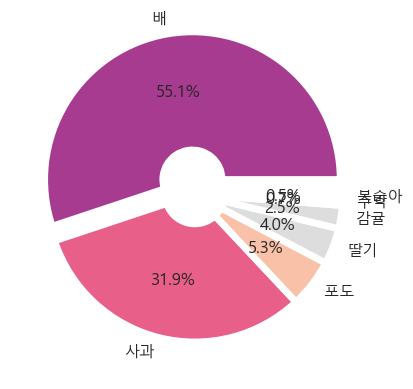

In [245]:
# 파이 차트 그리기
explode = [0.1, 0, 0, 0, 0, 0, 0]
colors = ['#a73b8f', '#e8608a', '#f8c1a8', '#ddd', '#ddd', '#ddd', '#ddd', '#ddd']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(new_df_copy.loc['한달판매량'], labels=new_df_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

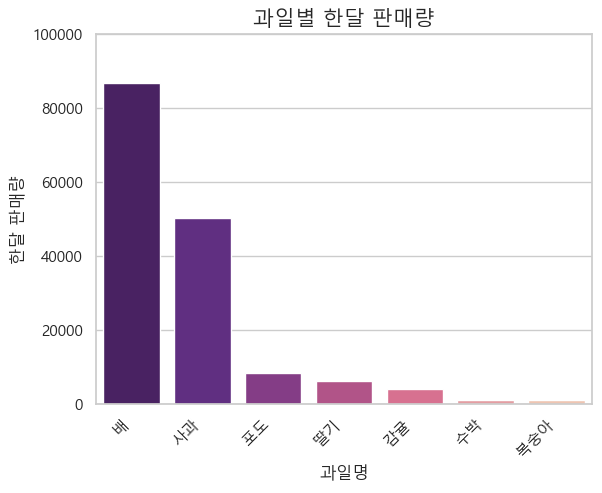

In [246]:
# 바 차트 그리기
colors = ['#f8c1a8', '#ef9198', '#e8608a', '#c0458a', '#8f3192', '#63218f', '#4b186c' ]
ax = sns.barplot(data=new_df, x=new_df.index, y='한달판매량', palette=reversed(colors))
ax.set_title('과일별 한달 판매량', fontsize=15)
ax.set_xlabel('과일명', fontsize=12)
ax.set_ylabel('한달 판매량', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # x축 눈금 지정
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000])  # y축 눈금 지정
plt.show()

# 5. 과일 재배지 분포 시각화 

## ※ 패키지 설치 및 로드

In [101]:
import re

## ※ 데이터 준비
[ 농가리스트 데이터 설명 ] <br>
자료명 : 농가리스트 <br>
파일명 : 농가리스트_과실류.xls, 농가리스트_과일과채류.xls  <br>

In [102]:
# 파일 경로와 시트명 설정
file_path1 = '농가리스트_과실류.xls' # 파일경로1

# Excel 파일 읽기 : 농가리스트_과실류
nong_list1 = pd.read_excel(file_path1, 
                   header=1)

# 데이터프레임 확인
print(nong_list1.shape)
nong_list1

(1865, 5)


,조직유형,농가명,생산품목,소재지,전화번호
0,농협,제주감귤농업협동조합,감귤,제주특별자치도 서귀포시 강정동155 제주감귤농협,064-739-5401
1,농협,제주지역조합공동사업법인,감귤,제주특별자치도 제주시 삼도일동794-3,064-720-1335
2,농협,김해시조합공동사업법인,단감,경상남도 김해시 서상동48-2,055-327-1500
3,농협,농협경제지주㈜경남지역본부,단감,경상남도 창원시 성산구 신월동95,055-268-1622
4,농협,청도군조합공동사업법인,떫은감,경상북도 청도군 화양읍 유등리,054-373-4983
...,...,...,...,...,...
1860,온라인농가,일월성농원,포도,경기 화성시 마도면,-
1861,온라인농가,천삼농장,포도,경기 화성시 송산면,-
1862,온라인농가,함안왕포도,포도,-,-
1863,온라인농가,산남감귤영농조합법인,하우스감귤,-,064-733-4855


In [103]:
file_path2 = '농가리스트_과일과채류.xls' # 파일경로2

# Excel 파일 읽기 : 농가리스트_과일과채류
nong_list2 = pd.read_excel(file_path2, 
                   header=1)

# 데이터프레임 확인
print(nong_list2.shape)
nong_list2

(663, 5)


,조직유형,농가명,생산품목,소재지,전화번호
0,농협,논산시농협조합공동사업법인,딸기,충청남도 논산시 연산면 청동리467,041-735-8602
1,농협,농업회사법인주식회사조이팜,딸기,경상남도 산청군 단성면 사월리25-2,055-973-1033
2,농협,농협경제지주㈜하동군연합사업단,딸기,경상남도 하동군 하동읍 읍내리34,055-883-1142
3,농협,곡성군연합사업단,메론,전라남도 곡성군 곡성읍 읍내리264,061-360-4708
4,일반법인,광일영농조합,수박,경상남도 함안군 법수면 강주리1339-1,055-582-5440
...,...,...,...,...,...
658,온라인농가,아침이슬농원,토마토,경기 고양시 일산동구,-
659,온라인농가,여가의뜰,토마토,강원 고성군 간성읍,-
660,온라인농가,은평영농,토마토,강원 원주시 신림면,-
661,온라인농가,제일농장,토마토,전북 순창군 금과면,063-652-6446


In [104]:
# 두 테이블 연결
nong_list = pd.concat([nong_list1, nong_list2])
nong_list.shape

(2528, 5)

In [105]:
# 결측치 제거
nong_list = nong_list.replace('-',np.nan)
nong_list = nong_list.dropna(subset=['생산품목', '소재지'])
nong_list.shape

(2455, 5)

In [106]:
# 중복행 체크
nong_list.duplicated(subset=['생산품목', '소재지']).sum()

872

In [107]:
# 중복행 제거
nong_list = nong_list.drop_duplicates(subset=['생산품목', '소재지'])
nong_list.shape

(1583, 5)

In [108]:
# 소재지 시 데이터 추출 1
nong_list['소재지'] = nong_list['소재지'].str.split(' ').str[0]

In [109]:
# 불필요한 데이터 제거
nong_list = nong_list.drop(columns=['조직유형', '농가명', '전화번호'])
nong_list.head()

,생산품목,소재지
0,감귤,제주특별자치도
1,감귤,제주특별자치도
2,단감,경상남도
3,단감,경상남도
4,떫은감,경상북도


In [110]:
# 생산품목 고유값 확인
nong_list['생산품목'].unique()

array(['감귤', '단감', '떫은감', '배', '복숭아', '사과(과실류)', '포도', '감', '감귤,만감',
       '감귤,한라봉', '과실류 기타', '과실류 기타,사과묘목          ', '과실류 묘목        ',
       '과실류 묘목        ,포도묘목          ', '구지뽕', '기타묘목          ', '단감,떫은감',
       '떫은감,감귤', '떫은감,매실', '떫은감,자두', '레몬', '만감', '만감,망고', '망고', '매실',
       '매실,감', '매실,과실류 기타', '무화과', '바나나', '배,과실류 기타', '배,단감', '배,떫은감',
       '배,복숭아', '배묘목            ', '보리수', '복숭아,매실', '복숭아,석류',
       '복숭아묘목         ', '블루베리', '사과(과실류),떫은감', '사과(과실류),매실',
       '사과(과실류),복숭아', '사과(과실류),사과묘목          ', '사과묘목          ',
       '산자나무(비타민나무)', '석류', '선인장열매', '오디', '유자', '자두', '자두묘목          ',
       '참다래(키위)', '참다래(키위),매실', '체리', '탱자', '파파야', '패션푸룻', '포도,무화과',
       '포도,자두', '포도,포도묘목          ', '포도묘목          ', '한라봉', '감말랭이',
       '개복숭아', '거봉', '건자두', '구아바잎', '금감', '꾸지뽕나무', '돌배', '레드향', '무화과(일반)',
       '블랙베리', '블랙커런트', '비파', '아사이베리', '영귤', '용과', '유자(일반)', '천혜향', '청견',
       '청포도', '체리(일반)', '파인애플', '패션프루트(일반)', '플럼코트(일반)', '하귤', '하스카프(일반)',
       '홍자두', '황금향'

In [111]:
# 특수문자를 " "로 치환
def replace_special_characters(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

# 함수 호출
nong_list['생산품목'] = nong_list['생산품목'].apply(replace_special_characters)
nong_list['생산품목'].unique() # 생산품목 고유값 확인

array(['감귤', '단감', '떫은감', '배', '복숭아', '사과 과실류 ', '포도', '감', '감귤 만감',
       '감귤 한라봉', '과실류 기타', '과실류 기타 사과묘목          ', '과실류 묘목        ',
       '과실류 묘목         포도묘목          ', '구지뽕', '기타묘목          ', '단감 떫은감',
       '떫은감 감귤', '떫은감 매실', '떫은감 자두', '레몬', '만감', '만감 망고', '망고', '매실',
       '매실 감', '매실 과실류 기타', '무화과', '바나나', '배 과실류 기타', '배 단감', '배 떫은감',
       '배 복숭아', '배묘목            ', '보리수', '복숭아 매실', '복숭아 석류',
       '복숭아묘목         ', '블루베리', '사과 과실류  떫은감', '사과 과실류  매실',
       '사과 과실류  복숭아', '사과 과실류  사과묘목          ', '사과묘목          ',
       '산자나무 비타민나무 ', '석류', '선인장열매', '오디', '유자', '자두', '자두묘목          ',
       '참다래 키위 ', '참다래 키위  매실', '체리', '탱자', '파파야', '패션푸룻', '포도 무화과',
       '포도 자두', '포도 포도묘목          ', '포도묘목          ', '한라봉', '감말랭이',
       '개복숭아', '거봉', '건자두', '구아바잎', '금감', '꾸지뽕나무', '돌배', '레드향', '무화과 일반 ',
       '블랙베리', '블랙커런트', '비파', '아사이베리', '영귤', '용과', '유자 일반 ', '천혜향', '청견',
       '청포도', '체리 일반 ', '파인애플', '패션프루트 일반 ', '플럼코트 일반 ', '하귤', '하스카프 일반 ',
       '홍자두', '황금향'

In [112]:
# 소재지 시 데이터 추출 2
nong_list['생산품목'] = nong_list['생산품목'].str.split(' ').str[0]
nong_list['생산품목'].unique()

array(['감귤', '단감', '떫은감', '배', '복숭아', '사과', '포도', '감', '과실류', '구지뽕',
       '기타묘목', '레몬', '만감', '망고', '매실', '무화과', '바나나', '배묘목', '보리수',
       '복숭아묘목', '블루베리', '사과묘목', '산자나무', '석류', '선인장열매', '오디', '유자', '자두',
       '자두묘목', '참다래', '체리', '탱자', '파파야', '패션푸룻', '포도묘목', '한라봉', '감말랭이',
       '개복숭아', '거봉', '건자두', '구아바잎', '금감', '꾸지뽕나무', '돌배', '레드향', '블랙베리',
       '블랙커런트', '비파', '아사이베리', '영귤', '용과', '천혜향', '청견', '청포도', '파인애플',
       '패션프루트', '플럼코트', '하귤', '하스카프', '홍자두', '황금향', '골드키위', '곶감', '기타',
       '백향', '아로니아', '카무카무', '딸기', '메론', '수박', '참외', '토마토', '과일과채류',
       '방울토마토', '산딸기', '대추방울', '송이토마토', '애플수박', '완숙토마토', '토마토묘'],
      dtype=object)